In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [2]:
import pandas as pd


df =pd.read_csv("Youtube02-KatyPerry.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [3]:
df.head(6)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
5,z12rw1o4zvidhdthz04cixxjssq5wzsrlpk0k,Nere Overstylish,2014-08-02T23:12:49,check out my rapping hope you guys like it ht...,1


In [4]:
df = df.drop(columns=['DATE','COMMENT_ID','AUTHOR'])

In [47]:
df.CONTENT.head(1)

0    i love this so much. AND also I Generate Free ...
Name: CONTENT, dtype: object

In [6]:
df.CLASS.value_counts()

1    175
0    175
Name: CLASS, dtype: int64

In [7]:
df.describe()

,CLASS
count,350.000000
mean,0.500000
std,0.500716
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  350 non-null    object
 1   CLASS    350 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [9]:
X =df.drop(columns=["CLASS"])
y =df["CLASS"]

In [10]:
X

,CONTENT
0,i love this so much. AND also I Generate Free ...
1,http://www.billboard.com/articles/columns/pop-...
2,Hey guys! Please join me in my fight to help a...
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...
4,Hey everyone. Watch this trailer!!!!!!!! http...
...,...
345,This song means so much to me thank you soooo...
346,&lt;3﻿
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA..."
348,Honestly speaking except taylor swift and adel...


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
345    0
346    0
347    1
348    0
349    0
Name: CLASS, Length: 350, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.CONTENT, 
    y,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=y
)

In [79]:
X_train.shape

(280,)

In [78]:
y_train.shape

(280,)

In [80]:
print(X_train.shape)
X_train.head()

(280,)


261    Check out my drum cover of E.T. here! thanks -...
130    Katty perry please say in one of your new vide...
53                      http://shhort.com/a?r=HuPwEH5ab﻿
262    Put famous people in the jungle for an hour an...
81     Katy perry is and inspirational singer her voi...
Name: CONTENT, dtype: object

In [81]:
y_train.value_counts()


1    140
0    140
Name: CLASS, dtype: int64

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.91      0.86      0.88        35

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70



In [30]:
X_test[:5]

165                                     love green eyes﻿
86     think drunk shoot half video sec half come boo...
119                                  human folly right?﻿
140    subscribe sub get shout tell type video u   wa...
142    Katycat https://m.facebook.com/profile.php?id=...
Name: preprocessed_CONTENT, dtype: object

In [31]:
y_pred[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [32]:
y_test[:5]

165    0
86     0
119    0
140    1
142    1
Name: CLASS, dtype: int64

In [33]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.91      0.89      0.90        35

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



In [34]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.91      0.91      0.91        35

    accuracy                           0.91        70
   macro avg       0.91      0.91      0.91        70
weighted avg       0.91      0.91      0.91        70



In [16]:
!python -m spacy download en


     -------------------------------------- 12.8/12.8 MB 459.4 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-13 23:44:04.807851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-13 23:44:04.807927: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 23:44:04.816734: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-E81CMVN
2022-08-13 23:44:04.816986: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-E81CMVN


In [35]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [36]:
preprocess("Thor ate pizza")

'Thor eat pizza'

In [37]:
df['preprocessed_CONTENT'] = df['CONTENT'].apply(preprocess) 

In [38]:
df.head()

,CONTENT,CLASS,preprocessed_CONTENT
0,i love this so much. AND also I Generate Free ...,1,love generate Free Leads Auto Pilot amp http...
1,http://www.billboard.com/articles/columns/pop-...,1,http://www.billboard.com/articles/columns/pop-...
2,Hey guys! Please join me in my fight to help a...,1,hey guy join fight help abuse mistreat animal ...
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1,http://psnboss.com/?ref=2tggp3pv6l song﻿
4,Hey everyone. Watch this trailer!!!!!!!! http...,1,hey watch trailer http://believemefilm.com?h...


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_CONTENT, 
    df.CLASS, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.CLASS
)

In [40]:
print(X_train.shape)
X_train.head()

(280,)


261    check drum cover E.T. thank -&gt    /watch?v =...
130    Katty perry new videoe follow   girl girl please﻿
53                      http://shhort.com/a?r=hupweh5ab﻿
262             famous people jungle hour look happens.﻿
81     Katy perry inspirational singer voice awesome ...
Name: preprocessed_CONTENT, dtype: object

In [41]:
y_train.value_counts()

1    140
0    140
Name: CLASS, dtype: int64

In [42]:
y_test.value_counts()

0    35
1    35
Name: CLASS, dtype: int64

In [44]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.91      0.89      0.90        35

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  3],
       [ 4, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

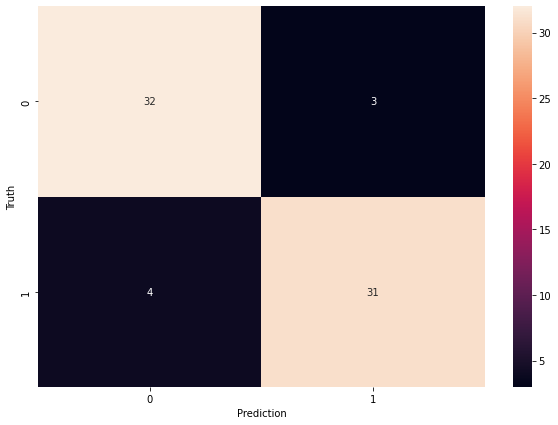

In [46]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')